# Gender Predictions Exploratory Data Analysis

## Imports

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [4]:
# fface_df = pd.read_csv("../data/fface_train.csv")
synms_gender_preds_df = pd.read_csv("../data/synms_gender_preds_fface.csv")

## Preprocess

In [5]:
with open('../data/synms_gender_labels.json', encoding='utf-8') as json_data:
    data = json.load(json_data)
    fface_classes = list(data.keys())
    fface_prompts = list(data.values())

In [11]:
'gentleman' in data['Female']

False

In [6]:
print(fface_classes)
print(fface_prompts)

['Male', 'Female']
[['gentleman', 'young man', 'adult male', 'male person', 'old man', 'patriarch', 'male', 'man', 'sir', 'dude', 'guy', 'boy', 'young boy', 'middle-aged man', 'brother', 'father', 'grandfather', 'grandpa', 'old geezer'], ['girl', 'missy', 'fancy woman', 'old woman', 'young woman', 'woman', 'female person', 'lady', 'young lady', 'adult female', 'madam', 'matriarch', 'miss', 'female', 'sister', 'mother', 'grandmother', 'grandma', 'granny']]


## Initial EDA

In [12]:
print(synms_gender_preds_df.shape)
synms_gender_preds_df.head()

(10954, 6)


,file,age,gender,race,service_test,gender_preds
0,val/1.jpg,3-9,Male,East Asian,False,young boy
1,val/2.jpg,50-59,Female,East Asian,True,female person
2,val/3.jpg,30-39,Male,White,True,middle-aged man
3,val/4.jpg,20-29,Female,Latino_Hispanic,True,female person
4,val/5.jpg,20-29,Male,Southeast Asian,False,man


In [13]:
print('Hole dataset race proportions')
synms_gender_preds_df.race.value_counts(
    normalize=True).mul(100).round(1).astype(str) + '%'

Hole dataset race proportions


race
White              19.0%
Latino_Hispanic    14.8%
Black              14.2%
East Asian         14.2%
Indian             13.8%
Southeast Asian    12.9%
Middle Eastern     11.0%
Name: proportion, dtype: object

In [14]:
synms_gender_preds_df.race.value_counts()

race
White              2085
Latino_Hispanic    1623
Black              1556
East Asian         1550
Indian             1516
Southeast Asian    1415
Middle Eastern     1209
Name: count, dtype: int64

In [15]:
print('Hole dataset gender proportions')
synms_gender_preds_df.gender.value_counts(
    normalize=True).mul(100).round(1).astype(str) + '%'

Hole dataset gender proportions


gender
Male      52.9%
Female    47.1%
Name: proportion, dtype: object

In [16]:
synms_gender_preds_df.gender.value_counts()

gender
Male      5792
Female    5162
Name: count, dtype: int64

### Binary Gender Predictions

In [17]:
print('Gender predictions proportions')
synms_gender_preds_df.gender_preds.value_counts(
    normalize=True).mul(100).round(1).astype(str) + '%'

Gender predictions proportions


gender_preds
female person      30.2%
middle-aged man    22.0%
young boy           8.8%
male person         8.5%
boy                 5.3%
grandmother         3.7%
mother              2.5%
girl                2.4%
grandfather         1.9%
young woman         1.8%
guy                 1.7%
man                 1.5%
young man           1.2%
father              1.2%
young lady          1.0%
old woman           1.0%
woman               0.9%
male                0.8%
madam               0.8%
missy               0.4%
sister              0.4%
miss                0.3%
old geezer          0.3%
brother             0.2%
old man             0.2%
grandpa             0.2%
grandma             0.2%
matriarch           0.1%
fancy woman         0.1%
sir                 0.1%
granny              0.1%
female              0.0%
patriarch           0.0%
adult male          0.0%
dude                0.0%
Name: proportion, dtype: object

In [18]:
synms_gender_preds_df.gender_preds.value_counts()

gender_preds
female person      3311
middle-aged man    2410
young boy           959
male person         935
boy                 581
grandmother         409
mother              275
girl                259
grandfather         210
young woman         202
guy                 188
man                 164
young man           130
father              128
young lady          114
old woman           105
woman                97
male                 90
madam                88
missy                49
sister               40
miss                 36
old geezer           35
brother              26
old man              26
grandpa              22
grandma              18
matriarch            14
fancy woman          12
sir                   9
granny                7
female                2
patriarch             1
adult male            1
dude                  1
Name: count, dtype: int64

In [ ]:
# TODO: synms to gender function mapping

In [14]:
gender_preds_misses = synms_gender_preds_df[synms_gender_preds_df['gender']
                                          != synms_gender_preds_df['gender_preds']]

In [15]:
gender_preds_acc = accuracy_score(
    raw_gender_preds_df['gender'], raw_gender_preds_df['gender_preds'])
print(f"gender_preds misses count: {len(gender_preds_misses)}")
print(f"gender_preds accuracy score: {round(gender_preds_acc, 2)}")

gender_preds misses count: 541
gender_preds accuracy score: 0.95


In [24]:
male_preds_acc = accuracy_score(
    raw_gender_preds_df[raw_gender_preds_df['gender'] == 'Male']['gender'], raw_gender_preds_df[raw_gender_preds_df['gender'] == 'Male']['gender_preds']
)
print(f"male predictions accuracy score: {round(male_preds_acc, 2)}")

male predictions accuracy score: 0.94


In [25]:
female_preds_acc = accuracy_score(
    raw_gender_preds_df[raw_gender_preds_df['gender'] ==
                        'Female']['gender'], raw_gender_preds_df[raw_gender_preds_df['gender'] == 'Female']['gender_preds']
)
print(f"female predictions accuracy score: {round(female_preds_acc, 2)}")

female predictions accuracy score: 0.96


## Plots

Gender predictions confusion matrix


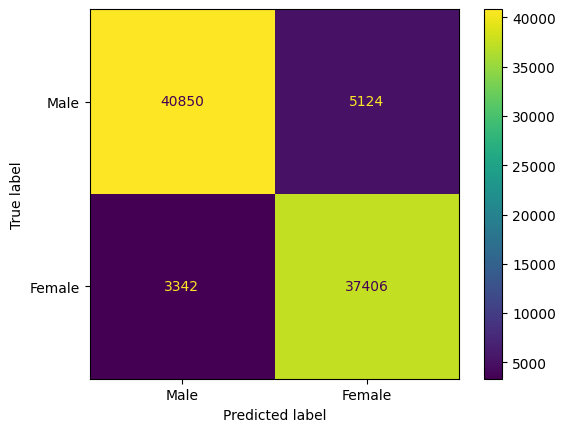

In [86]:
y_test = gender_preds_df['gender'].to_numpy()
binary_gender_predictions = gender_preds_df['gender_preds'].to_numpy()
gender_labels = ['Male', 'Female']
cm = confusion_matrix(y_test, binary_gender_predictions, labels=gender_labels)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=gender_labels)
print("Gender predictions confusion matrix")
disp.plot()

Synonyms Gender predictions confusion matrix


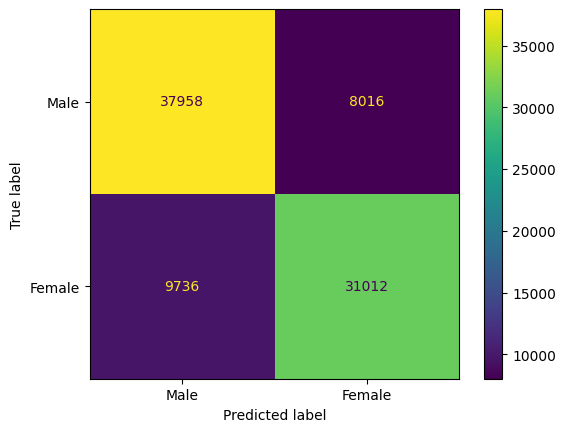

In [87]:
y_test = gender_preds_df['gender'].to_numpy()
synonyms_gender_predictions = binary_synms_preds_series.to_numpy()
gender_labels = ['Male', 'Female']
cm = confusion_matrix(y_test, synonyms_gender_predictions, labels=gender_labels)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=gender_labels)
print("Synonyms Gender predictions confusion matrix")
disp.plot()

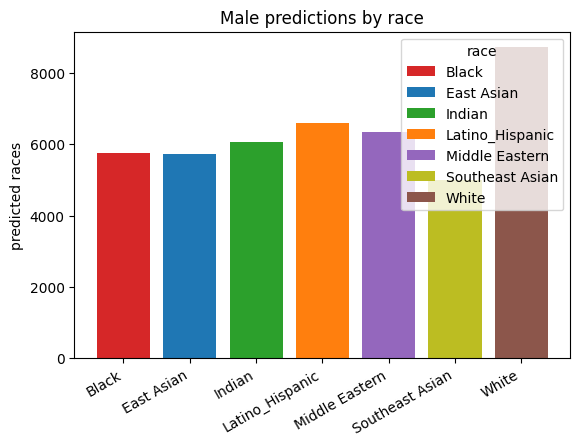

In [113]:
fig, ax = plt.subplots()

races = gender_preds_df['race'].unique()
races.sort()
counts = gender_preds_df[gender_preds_df['gender_preds'] == 'Male']['race'].value_counts().sort_index()
race_labels = races.copy()
bar_colors = ['tab:red', 'tab:blue', 'tab:green',
              'tab:orange', 'tab:purple', 'tab:olive', 'tab:brown']

ax.bar(races, counts, label=race_labels, color=bar_colors)

ax.set_ylabel('predicted races')
ax.set_title('Male predictions by race')
ax.legend(title='race')
ax.figure.autofmt_xdate()

plt.show()

In [110]:
races

array(['Black', 'East Asian', 'Indian', 'Latino_Hispanic',
       'Middle Eastern', 'Southeast Asian', 'White'], dtype=object)

In [107]:
counts.sort_index()

race
Black              5765
East Asian         5722
Indian             6051
Latino_Hispanic    6586
Middle Eastern     6348
Southeast Asian    4995
White              8725
Name: count, dtype: int64